## Illustration for documents

In [34]:
import IPython.display as ipd
from librosa import display
import librosa
import kapre
from keras.layers import Input
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

### Audio

In [2]:
# Read file
signal, sample_rate = librosa.load('fr-sb-495.wav', duration=5.0, sr=16000)
# Listen to file
ipd.Audio(data=signal, rate=sample_rate)

### Raw Waveform

Text(0, 0.5, 'Amplitude')

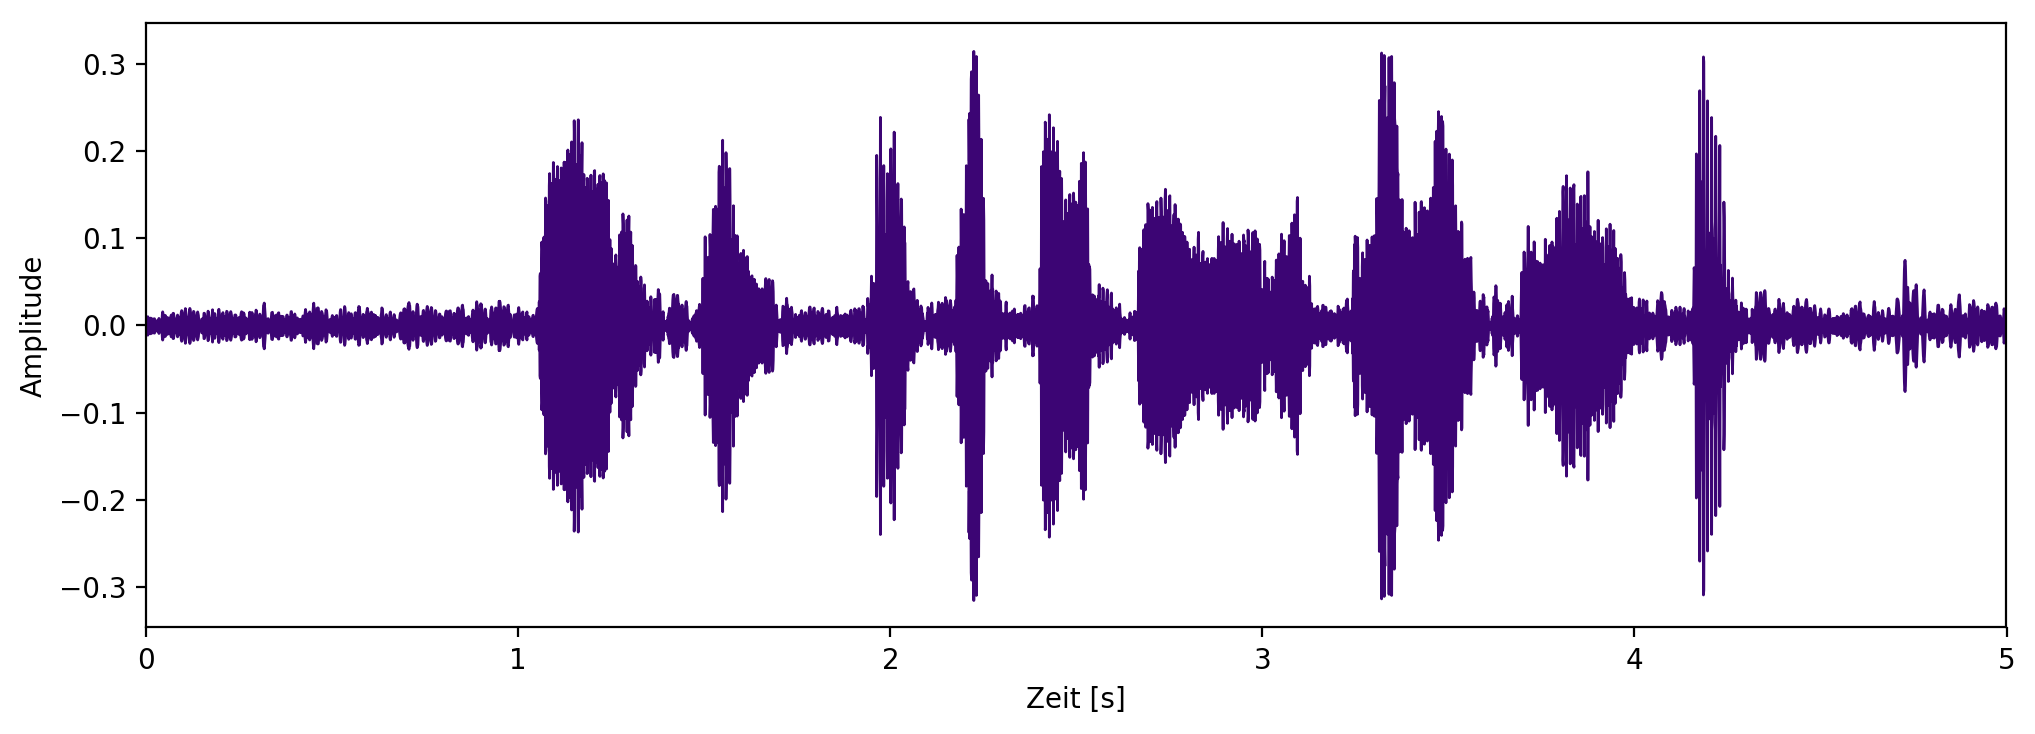

In [40]:
# Show raw audio domain
plt.figure(figsize=(12, 4), dpi=200) # set figure size and resolution
librosa.display.waveplot(signal, sr=sample_rate, x_axis='time', color='#3C0574')
plt.xlabel("Zeit [s]")
plt.ylabel("Amplitude")

### Spectrogram

([<matplotlib.axis.XTick at 0x13e116cf8>,
 <a list of 6 Text xticklabel objects>)

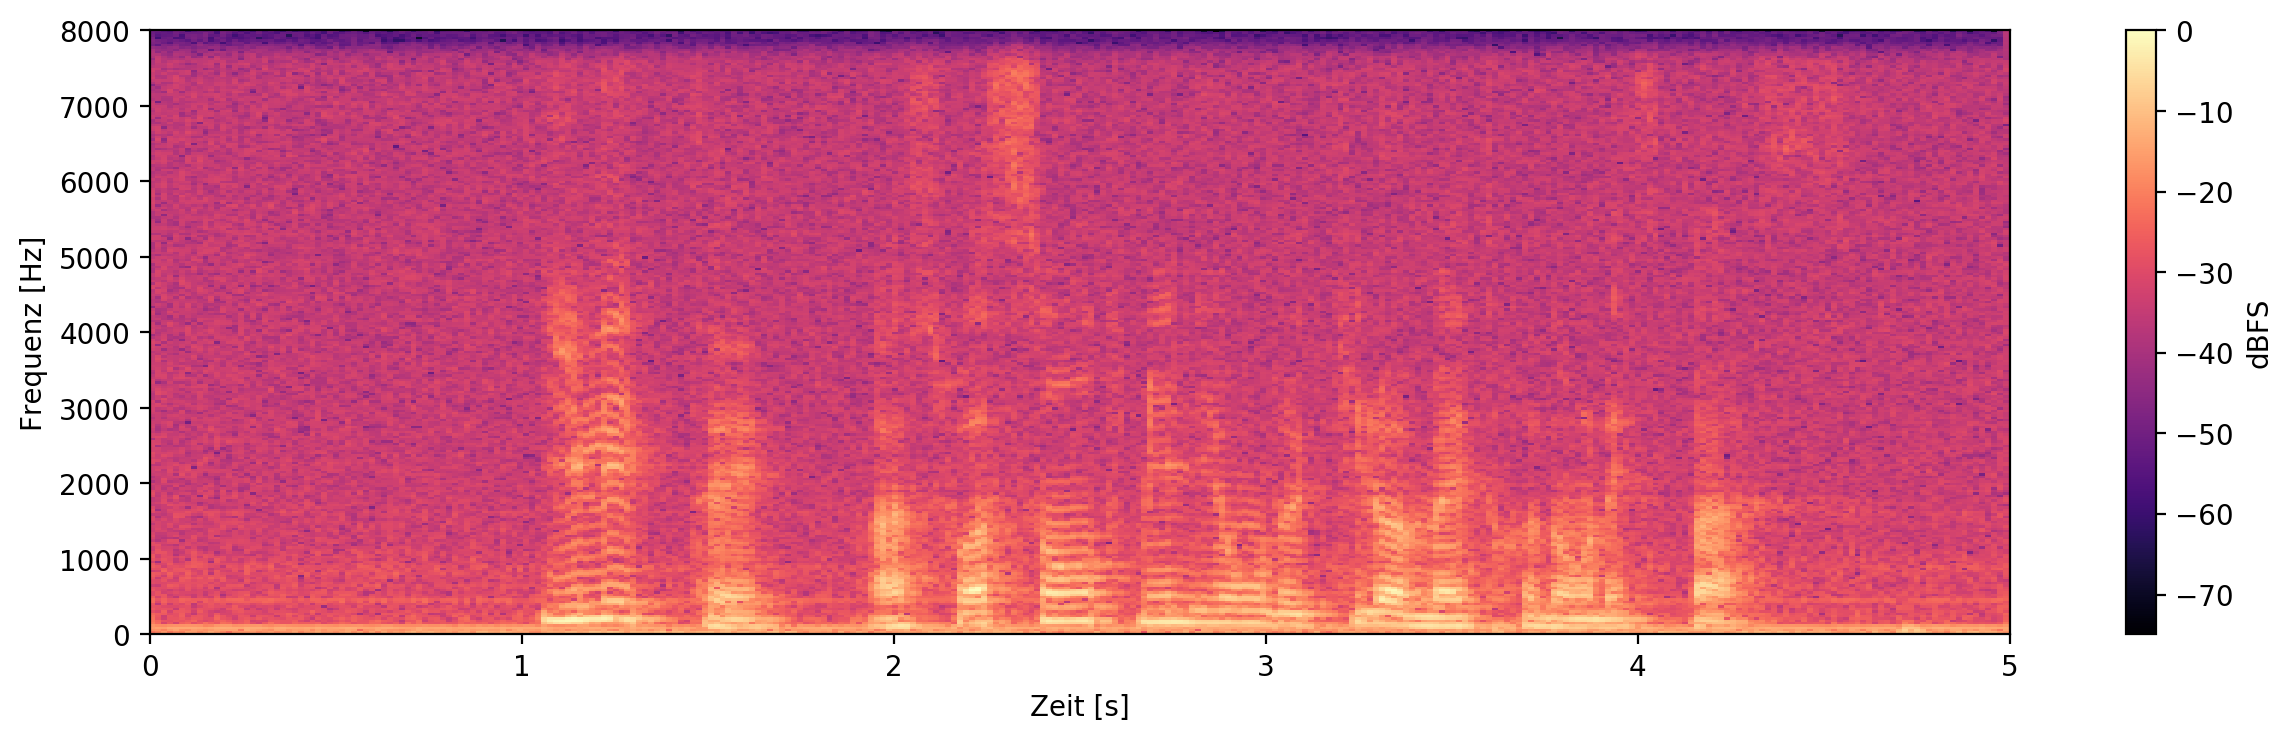

In [36]:
# Create mini keras model with only spectogram
data_input = Input(shape=(1, 80000))
layer = kapre.time_frequency.Spectrogram(n_dft=512, n_hop=None, padding='same',
                                 power_spectrogram=1.0, return_decibel_spectrogram=True,
                                 trainable_kernel=False, image_data_format='default')(data_input)
model = Model(inputs=data_input, outputs=layer)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy')

# Get spectrogram through model
spec = model.predict(signal[None, None, :])

# remove batch dimension
spec=np.squeeze(spec)

# set figures size and resololution
plt.figure(figsize=(15, 4), dpi=200)

# display spectrogram with right frequency ticks
display.specshow(spec, sr=16000, y_axis='linear', cmap='magma')

# Labels and colorbar on the right
plt.xlabel("Zeit [s]")
plt.ylabel("Frequenz [Hz]")
plt.colorbar(label="dBFS")

# Show time ticks at x
# linspace designates position of ticks while range contains the ticks
plt.xticks(np.linspace(0, spec.shape[1], 6), [i for i in range(6)])


## Melspectrogram

([<matplotlib.axis.XTick at 0x13fe27278>,
 <a list of 6 Text xticklabel objects>)

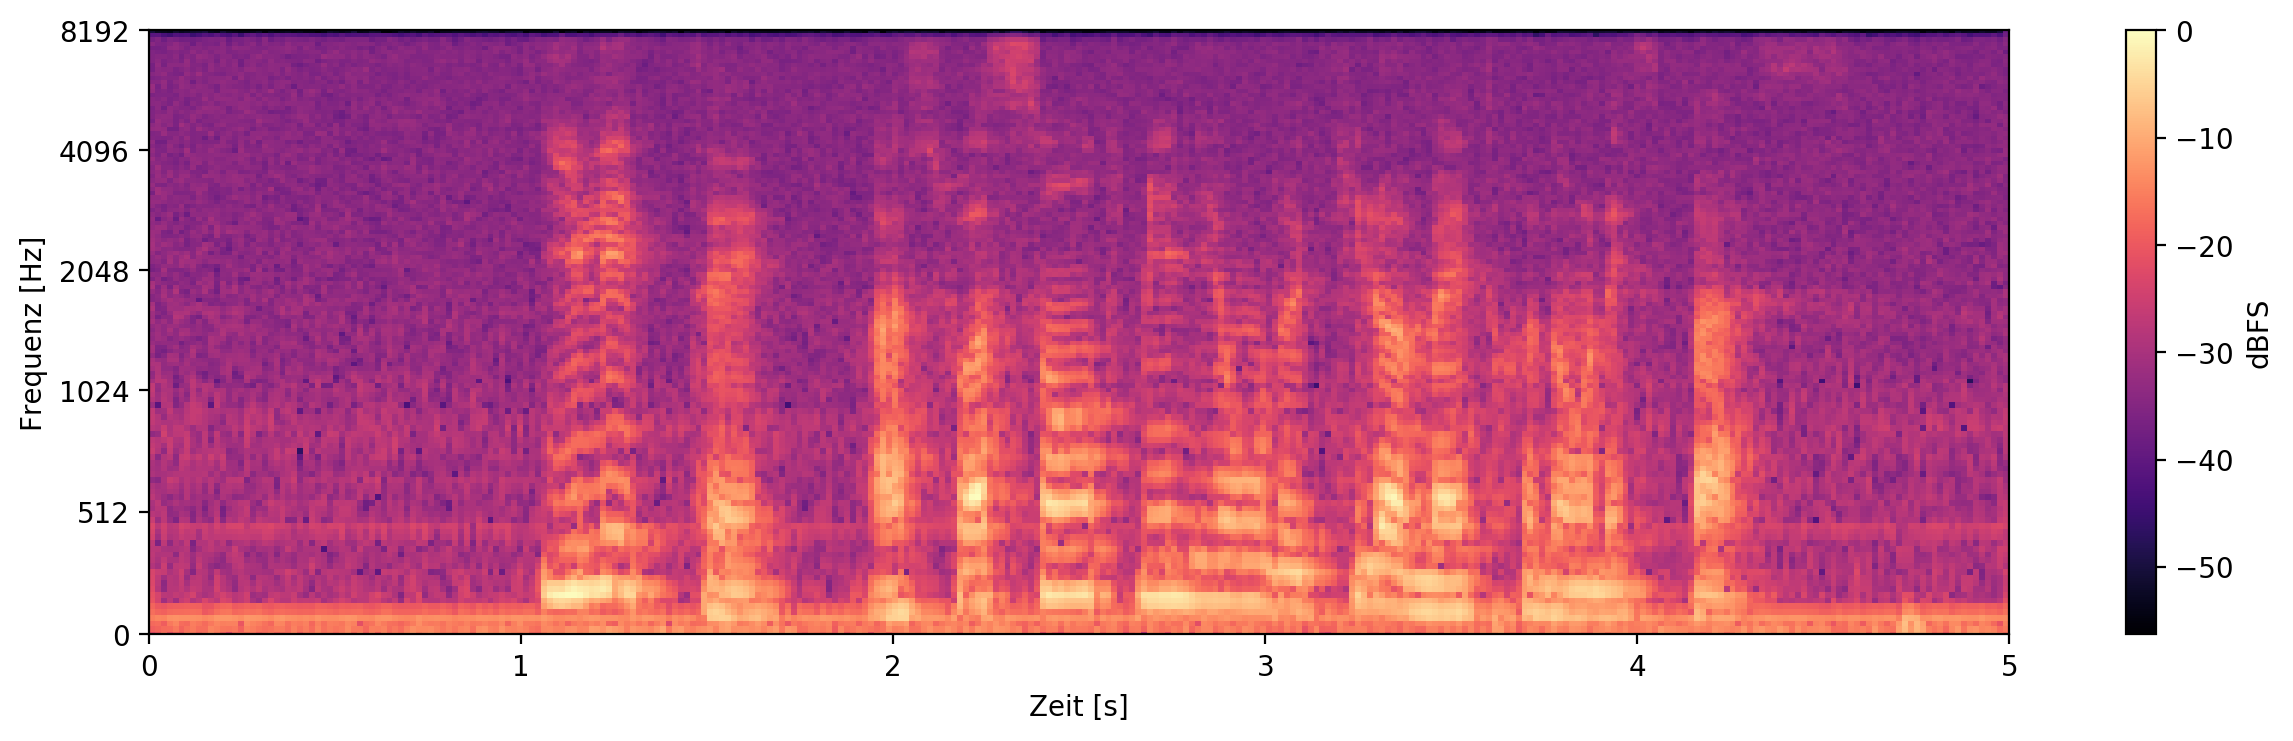

In [37]:
# Mini-Model
data_input = Input(shape=(1, 80000))
layer = kapre.time_frequency.Melspectrogram(sr=16000, n_mels=128, fmin=0.0, fmax=8192,
                                    power_melgram=1.0, return_decibel_melgram=True,
                                    trainable_fb=False)(data_input)
model = Model(inputs=data_input, outputs=layer)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy')
spec = model.predict(signal[None, None, :])

# Display spectrogram
spec=np.squeeze(spec)
plt.figure(figsize=(15, 4), dpi=200)
display.specshow(spec, sr=16000, y_axis='mel', cmap='magma', fmax=8192)
plt.xlabel("Zeit [s]")
plt.ylabel("Frequenz [Hz]")
plt.colorbar(label="dBFS")
plt.xticks(np.linspace(0, spec.shape[1], 6), [i for i in range(6)])